
## Online Retail Data Set II

## Customer Segmentation

Business Problem

The online company wants to gain more understanding of its customer in other to enhance marketing strategy and better manage customer engagement.

Context

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Content

Attribute Information:

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

## RFM Approach

1. Brief Introduction
2. Importing required libraries and data
3. Data prep and feature engineering
4. Simple visualization of the data and few samples
4. RFM calculation
5. RFM Analysis
6. KPI plots and analysis

## Brief Introduction

RFM stands for recency, frequency, and monetary value. 
A method used to segment customers based on when their last purchase was(recency), how often they’ve purchased in the past (frequency), and how much they’ve spent overall (monetary). The output can be used to increase customer retention, customer engagement and targeted marketing.
Certain KPI can also be generated from this analysis, e.g. Monthly/yearly average customer recency, average order value,

## Methodology

calculate Recency = number of days since last purchase

calculate Freqency = number of purchases during the studied period

calculate Monetary = total amount of purchases made during the studied period

find quintiles for each of these dimensions

give a grade to each dimension depending in which quantiles it stands

combine R, F and M scores to get the RFM score

map RF scores to segments

## Importing required libraries 

In [154]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from datetime import *
import matplotlib
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

## Import Data

In [173]:
sales = pd.read_csv('../Apriori/online_retail_II.csv')

# changes in online retail

In [169]:
# sales.drop(columns=['lower'], inplace=True)

In [170]:
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [171]:
#quick check on data column type
pd.DataFrame(sales.dtypes, columns=['Type'])

,Type
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
Price,float64
Customer ID,float64
Country,object


### Data Preparation

In [172]:
# convert InvoiceDate column to the right format
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'])

In [174]:
# Let's check the descriptives without 'Model'
sales.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628,5305,5698,NaN,47635,NaN,NaN,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350,5829,5918,NaN,1350,NaN,NaN,981330
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,15324.638504,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,1697.464450,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13975.000000,NaN
50%,NaN,NaN,NaN,3.000000e+00,NaN,2.100000e+00,15255.000000,NaN
75%,NaN,NaN,NaN,1.000000e+01,NaN,4.150000e+00,16797.000000,NaN


In [175]:
# From the descriptive statistics, we can see some negative values in Quantity and Price, so Lets have a look
negprice = sales[sales['Price'] < 0]
negquantity = sales[sales['Quantity'] < 0]
print(len(negprice))
print(len(negquantity))

5
22950


In [176]:
## take out negative price from the sales data
sales = sales[sales['Price']>= 0]

## we have also identify some descriptions that doesnt look like sales
sales2 = sales[sales['Description'].isin(['?',
'?????',
'back charges',
'bad quality',
'Came as green?',
'Came as green?',
'cant find',
'cant find',
'check',
'checked',
'checked',
'code mix up 72597',
'code mix up 72597',
'coding mix up',
'crushed',
'crushed',
'damaged',
'damaged/dirty',
'damaged?',
'damages',
'damages etc',
'damages, lost bits etc',
'damages?',
'damges',
'Damp and rusty',
'dirty',
'dirty, torn, thrown away.',
'display',
'entry error',
'faulty',
'for show',
'given away',
'gone',
'Gone',
'incorrect credit',
'lost',
'lost in space',
'lost?',
'missing',
'Missing',
'missing (wrongly coded?)',
'missing?',
'missings',
'reverse mistake',
'Rusty ',
'Rusty connections',
'show',
'show display',
'smashed',
'sold in wrong qnty',
'This is a test product.',
'used for show display',
'wet',
'wet & rotting',
'wet and rotting',
'wet cartons',
'wet ctn',
'wet damages',
'Wet, rusty-thrown away',
'wet/smashed/unsellable',
'wrong code',
'wrong ctn size',
'Zebra invcing error'])]

In [177]:
## so lets take those spurious sales out
sales = sales[~sales.apply(tuple,1).isin(sales2.apply(tuple,1))]

In [178]:
#Lets check for missing values
sales.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243002
Country             0
dtype: int64

541907

In [179]:
# ## About 20% of the dataset has missing customer ID and 0.4% of the dataset has no description
# # SO I willa ssume that the missing customer id are 9999 and the description is 'Unlnown'

# sales[['Customer ID']] =sales[['Customer ID']].fillna(99999)
# sales[['Description']] =sales[['Description']].fillna('Unknown')

In [180]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067350 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067350 non-null  object 
 1   StockCode    1067350 non-null  object 
 2   Description  1062968 non-null  object 
 3   Quantity     1067350 non-null  int64  
 4   InvoiceDate  1067350 non-null  object 
 5   Price        1067350 non-null  float64
 6   Customer ID  824348 non-null   float64
 7   Country      1067350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB


In [181]:
sales.dropna(inplace=True)

In [182]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824348 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824348 non-null  object 
 1   StockCode    824348 non-null  object 
 2   Description  824348 non-null  object 
 3   Quantity     824348 non-null  int64  
 4   InvoiceDate  824348 non-null  object 
 5   Price        824348 non-null  float64
 6   Customer ID  824348 non-null  float64
 7   Country      824348 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [183]:
sales.to_csv('../Apriori/onlineretail2_clean.csv', index=False)

In [166]:
sales.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [113]:
# lets also take out all negative quantity as, they are either returns or errors in the data.
sales = sales[sales['Quantity'] > 0]

#sales['ordertype'] = np.where(sales['Quantity'] < 0,'sale','return')

In [114]:
# Let's check the descriptives without 'Model'
sales.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,397924.0,397924,397924,397924.000000,397924,397924.000000,397924.000000,397924
unique,18536.0,3665,3877,NaN,17286,NaN,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,542.0,2035,2028,NaN,542,NaN,NaN,354345
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.021823,NaN,3.116174,15294.315171,NaN
std,NaN,NaN,NaN,180.420210,NaN,22.096788,1713.169877,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13969.000000,NaN


In [115]:
## Now Lets find the first and second time a customer ordered by aggregating the values
sales_ = sales.groupby('Invoice').agg(
    Customer =('Customer ID', 'first'),
    InvoiceDate2=('InvoiceDate', 'min'))
sales_.reset_index(inplace = True)
sales_['daterank'] = sales_.groupby('Customer')['InvoiceDate2'].rank(method="first", ascending=True)

# find customers second purchase and name dataframe sales_
sales_ = sales_[sales_['daterank']== 2]
sales_.drop(['Invoice', 'daterank'], axis=1, inplace=True)
sales_.columns = ['Customer ID', 'InvoiceDate2']
sales_

,Customer ID,InvoiceDate2
1,17850.0,2010-12-01 08:28:00
3,13047.0,2010-12-01 08:34:00
20,16029.0,2010-12-01 09:58:00
32,13448.0,2010-12-01 10:53:00
51,14849.0,2010-12-01 12:22:00
...,...,...
18464,13404.0,2011-12-08 15:37:00
18465,16322.0,2011-12-08 15:41:00
18479,17144.0,2011-12-08 17:57:00
18503,16446.0,2011-12-09 09:15:00


In [116]:
# Lets Aggregate the data to find certain customer metrics 
sales['amount'] = sales['Price'] * sales['Quantity']
salesgroup = sales.groupby('Customer ID').agg(
    Country=('Country', 'first'),
    sum_price=('Price', 'sum'),
    sum_quantity=('Quantity', 'sum'),
    max_date=('InvoiceDate', 'max'),
    min_date=('InvoiceDate', 'min'),
    count_order=('Invoice', 'nunique'),
    avgitemprice=('Price', 'mean'),
    monetary =('amount', 'sum'),
    count_product=('Invoice', 'count'))

salesgroup.reset_index(inplace = True)
salesgroup

,Customer ID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,United Kingdom,47.65,45,2011-03-07 09:52:00,2011-03-07 09:52:00,1,4.765000,180.60,10
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756


In [117]:
#Find the max date of this study
maxdate = sales['InvoiceDate'].max()


In [118]:
#Calculate AOV. Item per basket
salesgroup['avgordervalue'] = salesgroup['monetary']/salesgroup['count_order']
salesgroup['itemsperbasket'] = salesgroup['sum_quantity']/salesgroup['count_order']

# join the data with the dataframe containing customer id with 2nd visits
salesgroup = pd.merge(salesgroup, sales_ , how='left', on=['Customer ID'])
salesgroup

,Customer ID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,avgordervalue,itemsperbasket,InvoiceDate2
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,77183.600000,74215.000000,NaT
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,615.714286,351.142857,2011-01-26 14:30:00
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,449.310000,585.250000,2011-01-25 10:42:00
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,1757.550000,631.000000,NaT
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,334.400000,197.000000,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,United Kingdom,47.65,45,2011-03-07 09:52:00,2011-03-07 09:52:00,1,4.765000,180.60,10,180.600000,45.000000,NaT
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7,80.820000,54.000000,NaT
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12,89.025000,51.500000,2011-12-02 11:43:00
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756,130.930000,87.312500,2011-01-23 14:58:00


In [119]:
# find difference between first purchase and 2nd purchase 
salesgroup['daysreturn']  = salesgroup['InvoiceDate2']- salesgroup['min_date']
salesgroup['daysreturn'] = salesgroup['daysreturn']/np.timedelta64(1,'D')
salesgroup['daysmaxmin']  = salesgroup['max_date']- salesgroup['min_date']
salesgroup['daysmaxmin'] = (salesgroup['daysmaxmin']/np.timedelta64(1,'D')) + 1
salesgroup

,Customer ID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,avgordervalue,itemsperbasket,InvoiceDate2,daysreturn,daysmaxmin
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,77183.600000,74215.000000,NaT,NaN,1.000000
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,615.714286,351.142857,2011-01-26 14:30:00,49.981250,366.038194
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,449.310000,585.250000,2011-01-25 10:42:00,39.647917,283.752778
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,1757.550000,631.000000,NaT,NaN,1.000000
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,334.400000,197.000000,NaT,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,United Kingdom,47.65,45,2011-03-07 09:52:00,2011-03-07 09:52:00,1,4.765000,180.60,10,180.600000,45.000000,NaT,NaN,1.000000
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7,80.820000,54.000000,NaT,NaN,1.000000
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12,89.025000,51.500000,2011-12-02 11:43:00,118.922222,119.922222
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756,130.930000,87.312500,2011-01-23 14:58:00,17.030556,334.908333


## RFM Calculation

$\text{Frequency} = \frac{\text{Number of orders}}{\text{Last purchase date}-\text{First purchase date}}$ (1)

$\text{Recency} = \text{Last date of period }-\text{ Last purchase date}$ (2)

In [120]:
#calculate Frequency and Recency
salesgroup['frequency'] = np.where(salesgroup['count_order'] >1,salesgroup['count_order']/salesgroup['daysmaxmin'],0)
salesgroup['recency']  = maxdate- salesgroup['max_date']
salesgroup['recency'] = salesgroup['recency']/np.timedelta64(1,'D')
salesgroup

,Customer ID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,avgordervalue,itemsperbasket,InvoiceDate2,daysreturn,daysmaxmin,frequency,recency
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,77183.600000,74215.000000,NaT,NaN,1.000000,0.000000,325.117361
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,615.714286,351.142857,2011-01-26 14:30:00,49.981250,366.038194,0.019124,1.873611
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,449.310000,585.250000,2011-01-25 10:42:00,39.647917,283.752778,0.014097,74.984028
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,1757.550000,631.000000,NaT,NaN,1.000000,0.000000,18.124306
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,334.400000,197.000000,NaT,NaN,1.000000,0.000000,309.867361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,United Kingdom,47.65,45,2011-03-07 09:52:00,2011-03-07 09:52:00,1,4.765000,180.60,10,180.600000,45.000000,NaT,NaN,1.000000,0.000000,277.123611
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7,80.820000,54.000000,NaT,NaN,1.000000,0.000000,180.081250
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12,89.025000,51.500000,2011-12-02 11:43:00,118.922222,119.922222,0.016677,7.046528
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756,130.930000,87.312500,2011-01-23 14:58:00,17.030556,334.908333,0.047774,3.033333


In [121]:
salesgroup.describe(include='all')

,Customer ID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,avgordervalue,itemsperbasket,InvoiceDate2,daysreturn,daysmaxmin,frequency,recency
count,4339.000000,4339,4339.000000,4339.000000,4339,4339,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,2845,2845.000000,4339.000000,4339.000000,4339.000000
unique,NaN,37,NaN,NaN,4200,4241,NaN,NaN,NaN,NaN,NaN,NaN,2815,NaN,NaN,NaN,NaN
top,NaN,United Kingdom,NaN,NaN,2011-12-01 13:47:00,2010-12-07 15:48:00,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-01 13:45:00,NaN,NaN,NaN,NaN
freq,NaN,3921,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 09:53:00,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-01 08:28:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,2011-12-09 12:16:00,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-09 10:46:00,NaN,NaN,NaN,NaN
mean,15299.936852,NaN,285.780275,1194.214335,NaN,NaN,4.271952,4.465257,2053.793018,91.708689,419.047702,256.313903,NaN,76.662046,131.742178,0.058784,92.031299
std,1721.889758,NaN,880.545716,5055.603049,NaN,NaN,7.705493,34.207313,8988.248381,228.792852,1796.320814,1325.939105,NaN,76.753044,132.211163,0.338220,100.008812
min,12346.000000,NaN,0.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,0.000000,1.000000,0.000000,0.000000
25%,13812.500000,NaN,51.685000,160.000000,NaN,NaN,1.000000,2.203233,307.245000,17.000000,178.505000,93.000000,NaN,19.864583,1.000000,0.000000,17.069097


## RFM Calculation 
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool. Unless using specialized software, it’s recommended to divide the customers into four tiers for each dimension, such that each customer will be assigned to one tier in each dimension:

Recency
R-Tier-1 (most recent)
R-Tier-2
R-Tier-3
R-Tier-4 (least recent)


Frequency
F-Tier-1 (most frequent)
F-Tier-2
F-Tier-3
F-Tier-4 (only one transaction)


Monetary
M-Tier-1 (highest spend)
M-Tier-2
M-Tier-3
M-Tier-4 (lowest spend)

This results in 64 distinct customer segments (4x4x4), into which customers will be segmented. Three tiers can also be used (resulting in 27 segments); using more than four, however, is not recommended (because the difficulty in use outweighs the small benefit gain from the extra granularity).

As mentioned above, more sophisticated and less manual approaches – such as k-means cluster analysis – can be performed by software, resulting in groups of customers with more homogeneous characteristics.



In [122]:
# Now we have the values for Recency, Frequency and Monetary parameters. Each customer will get a note between 1 and 4 for each parameter.
#By Applying quantile method we group each quantile into 25% of the population. 

#so letsdefine the quantile and save it ina dictionary
quintiles = salesgroup[['recency', 'frequency', 'monetary']].quantile([.25, .50, .75]).to_dict()
quintiles2 = salesgroup[['recency', 'frequency', 'monetary']].quantile([.2, .4, 0.6, .8]).to_dict()
quintiles

{'recency': {0.25: 17.069097222222222,
  0.5: 50.08541666666667,
  0.75: 141.52083333333331},
 'frequency': {0.25: 0.0,
  0.5: 0.015680876735241465,
  0.75: 0.03149688539702224},
 'monetary': {0.25: 307.24499999999995,
  0.5: 674.4499999999998,
  0.75: 1661.6400000000003}}

In [123]:
# Create a fuction that assign ranks from 1 to 4. 
# A smaller Recency value is better
# For Frequency and Monetary values, a Higher value is better. 
# so we have two different functions.

In [124]:
def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 1
    elif x <= quintiles['recency'][.50]:
        return 2
    elif x <= quintiles['recency'][.75]:
        return 3
    else:
        return 4
    
def fm_score(x, c):
    if x <= quintiles[c][.25]:
        return 1
    elif x <= quintiles[c][.50]:
        return 2
    elif x <= quintiles[c][.75]:
        return 3
    else:
        return 4    

In [125]:
#lets get the RFM values by calling the function above

salesgroup['R'] = salesgroup['recency'].apply(lambda x: r_score(x))
salesgroup['F'] = salesgroup['frequency'].apply(lambda x: fm_score(x, 'frequency'))
salesgroup['M'] = salesgroup['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [126]:

salesgroup['RFM Score'] = salesgroup['R'].map(str) + salesgroup['F'].map(str) + salesgroup['M'].map(str)
salesgroup['RFM Score'] = salesgroup['RFM Score'].astype(int)

 ## RFM Score Interpretation

RFM for Marketing Communication purpose

The third step is to select groups of customers to whom specific types of communications will be sent, based on the RFM segments in which they appear.

It is helpful to assign names to segments of interest. Here are just a few examples to illustrate:

Best Customers – This group consists of those customers who are found in R-Tier-1, F-Tier-1 and M-Tier-1, meaning that they transacted recently, do so often and spend more than other customers. A shortened notation for this segment is 1-1-1; we’ll use this notation going forward.

High-spending New Customers – This group consists of those customers in 1-4-1 and 1-4-2. These are customers who transacted only once, but very recently and they spent a lot.

Lowest-Spending Active Loyal Customers – This group consists of those customers in segments 1-1-3 and 1-1-4 (they transacted recently and do so often, but spend the least).

Churned Best Customers – This segment consists of those customers in groups 4-1-1, 4-1-2, 4-2-1 and 4-2-2 (they transacted frequently and spent a lot, but it’s been a long time since they’ve transacted).


Marketers should assemble groups of customers most relevant for their particular business objectives and retention goals.

In [127]:
pd.DataFrame(salesgroup.dtypes, columns=['Type'])
salesgroup['RFM Score'] = salesgroup['RFM Score'].astype(int)

In [128]:
def rrr(salesgroup):
    if salesgroup['RFM Score'] == 111 :
        d = 'Best Customers'
    elif salesgroup['RFM Score'] == 112 :
        d = 'High Spending New Customers'
    elif salesgroup['RFM Score'] == 113 :
        d = 'Lowest Spending Active Lyal Customers'
    elif salesgroup['RFM Score'] == 114 :
        d = 'Lowest Spending Active Lyal Customers'
    elif salesgroup['RFM Score'] == 422 :
        d = 'Churned Best Customers'
    elif salesgroup['RFM Score'] == 421 :
        d = 'Churned Best Customers'
    elif salesgroup['RFM Score'] == 412 :
        d = 'Churned Best Customers'
    elif salesgroup['RFM Score'] == 411 :
        d = 'Churned Best Customers'
    else:
        d = 'Unclassed'
    return d

salesgroup['comms_label'] = salesgroup.apply(rrr, axis=1)
salesgroup

,Customer ID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,...,InvoiceDate2,daysreturn,daysmaxmin,frequency,recency,R,F,M,RFM Score,comms_label
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,...,NaT,NaN,1.000000,0.000000,325.117361,4,1,4,414,Unclassed
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,...,2011-01-26 14:30:00,49.981250,366.038194,0.019124,1.873611,1,3,4,134,Unclassed
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,...,2011-01-25 10:42:00,39.647917,283.752778,0.014097,74.984028,3,2,4,324,Unclassed
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,...,NaT,NaN,1.000000,0.000000,18.124306,2,1,4,214,Unclassed
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,...,NaT,NaN,1.000000,0.000000,309.867361,4,1,2,412,Churned Best Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,United Kingdom,47.65,45,2011-03-07 09:52:00,2011-03-07 09:52:00,1,4.765000,180.60,10,...,NaT,NaN,1.000000,0.000000,277.123611,4,1,1,411,Churned Best Customers
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7,...,NaT,NaN,1.000000,0.000000,180.081250,4,1,1,411,Churned Best Customers
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12,...,2011-12-02 11:43:00,118.922222,119.922222,0.016677,7.046528,1,3,1,131,Unclassed
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756,...,2011-01-23 14:58:00,17.030556,334.908333,0.047774,3.033333,1,4,4,144,Unclassed


With the above classification a marketting team may decide to tailor its communication as follows;

Best Customers – Communications with this group should make them feel valued and appreciated. These customers likely generate a disproportionately high percentage of overall revenues and thus focusing on keeping them happy should be a top priority. Further analyzing their individual preferences and affinities will provide additional opportunities for even more personalized messaging.

High-spending New Customers – It is always a good idea to carefully “incubate” all new customers, but because these new customers spent a lot on their first purchase, it’s even more important. Like with the Best Customers group, it’s important to make them feel valued and appreciated – and to give them terrific incentives to continue interacting with the brand.

Lowest-Spending Active Loyal Customers – These repeat customers are active and loyal, but they are low spenders. Marketers should create campaigns for this group that make them feel valued, and incentivize them to increase their spend levels. As loyal customers, it often also pays to reward them with special offers if they spread the word about the brand to their friends, e.g., via social networks.


Churned Best Customers – These are valuable customers who stopped transacting a long time ago. While it’s often challenging to re-engage churned customers, the high value of these customers makes it worthwhile trying. Like with the Best Customers group, it’s important to communicate with them on the basis of their specific preferences, as known from earlier transaction data.


source:https://www.optimove.com/resources/learning-center/rfm-segmentation

## RFM for Customer Insight (sales)

In [129]:
def www(salesgroup):
    if salesgroup['RFM Score'] == 111 : 
        d = 'Core'
    elif salesgroup['F'] == 1 : 
        d = 'Loyal'
    elif salesgroup['M'] == 1 : 
        d = 'Whales'
    elif salesgroup['F'] == 1 &  salesgroup['M'] == 3: 
        d = 'Promising'
    elif salesgroup['F'] == 1 &  salesgroup['M'] == 4: 
        d = 'Promising'
    elif salesgroup['R'] == 1 & salesgroup['F'] == 4: 
        d = 'Rookies'
    elif salesgroup['R'] == 4 & salesgroup['F'] == 4 : 
        d = 'Slipping'
    else:
        d = 'Unclassed'
    return d

salesgroup['sales_label'] = salesgroup.apply(www, axis=1)
salesgroup

,Customer ID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,...,daysreturn,daysmaxmin,frequency,recency,R,F,M,RFM Score,comms_label,sales_label
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,...,NaN,1.000000,0.000000,325.117361,4,1,4,414,Unclassed,Loyal
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,...,49.981250,366.038194,0.019124,1.873611,1,3,4,134,Unclassed,Unclassed
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,...,39.647917,283.752778,0.014097,74.984028,3,2,4,324,Unclassed,Unclassed
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,...,NaN,1.000000,0.000000,18.124306,2,1,4,214,Unclassed,Loyal
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,...,NaN,1.000000,0.000000,309.867361,4,1,2,412,Churned Best Customers,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,United Kingdom,47.65,45,2011-03-07 09:52:00,2011-03-07 09:52:00,1,4.765000,180.60,10,...,NaN,1.000000,0.000000,277.123611,4,1,1,411,Churned Best Customers,Loyal
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7,...,NaN,1.000000,0.000000,180.081250,4,1,1,411,Churned Best Customers,Loyal
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12,...,118.922222,119.922222,0.016677,7.046528,1,3,1,131,Unclassed,Whales
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756,...,17.030556,334.908333,0.047774,3.033333,1,4,4,144,Unclassed,Unclassed


Another perspective of RFM or customer segmentation is to increase Sales.
By applying the following scoring system as stated on https://www.barilliance.com/rfm-analysis/

Core - Your Best Customers
RFM Score: 111

Who They Are: Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.

Marketing Strategies: Focus on loyalty programs and new product introductions. These customers have proven to have a higher willingness to pay, so don't use discount pricing to generate incremental sales. Instead, focus on value added offers through product recommendations based on previous purchases.

Loyal - Your Most Loyal Customers
RFM Score: X1X

Who They Are: Customers who buy the most often from your store.

Marketing Strategies: Loyalty programs are effective for these repeat visitors. Advocacy programs and reviews are also common X1X strategies. Lastly, consider rewarding these customers with Free Shipping or other like benefits.

Whales - Your ​Highest Paying Customers
RFM Score: XX1

Who They Are: Customers who have generated the most revenue for your store.

Marketing Strategies: These customers have demonstrated a high willingness to pay. Consider premium offers, subscription tiers, luxury products, or value add cross/up-sells to increase AOV. Don't waste margin on discounts. 


Promising - Faithful customers
RFM Score: X13, X14

Who They Are: Customers who return often, but do not spend a lot.

Marketing Strategies: You've already succeeded in creating loyalty. Focus on increasing monetization through product recommendations based on past purchases and incentives tied to spending thresholds (pegged to your store AOV). 

Rookies - Your Newest Customers
RFM Score: 14X

Who They Are: First time buyers on your site.

Marketing Strategies: Most customers never graduate to loyal. Having clear strategies in place for first time buyers such as triggered welcome emails will pay dividends.

Slipping - ​Once Loyal, Now Gone
RFM Score: 44X

Who They Are: Great past customers who haven't bought in awhile.

Marketing Strategies: Customers leave for a variety of reasons. Depending on your situation price deals, new product launches, or other retention strategies.



Distribution of Recency, Frequency and Monetary
Recency distribution is right-skewed, showing that the majority of customers made a purchase in the recent past. It has a long tail containing single customers who made their order long time ago.

Both frequency and monetary distributions are bimodal (with two different peaks - modes). The chart reveals that one group of customers has low frequency (small number of orders, around 10 per customer) and another group is much more "loyal" (with around 50 purchases per customer). When it comes to monetary, it follows similar pattern. Part of customers have only spent little amount of money but there is another (significant in size) group that have spent much more.

Frequency and monetary distributions suggest that there are visible differences between different groups of customers. By looking at the distribution of three the biggest segments: "loyal customers", "hibernating", "potential loyalist" it's easy to see that indeed they build up different parts of total distribution, eg. hibernating customers are responsible for first monetary peak and loyal customers for the second peak.

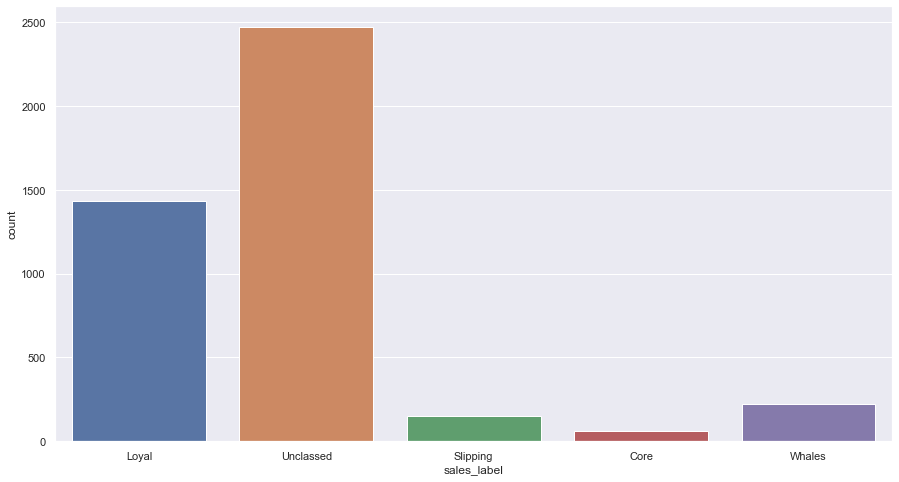

In [130]:
## Quick Plot of the count of customer ID in various classification based on the first instance which was Marketting

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

sns.set(style="darkgrid")
ax = sns.countplot(x="sales_label", data=salesgroup)


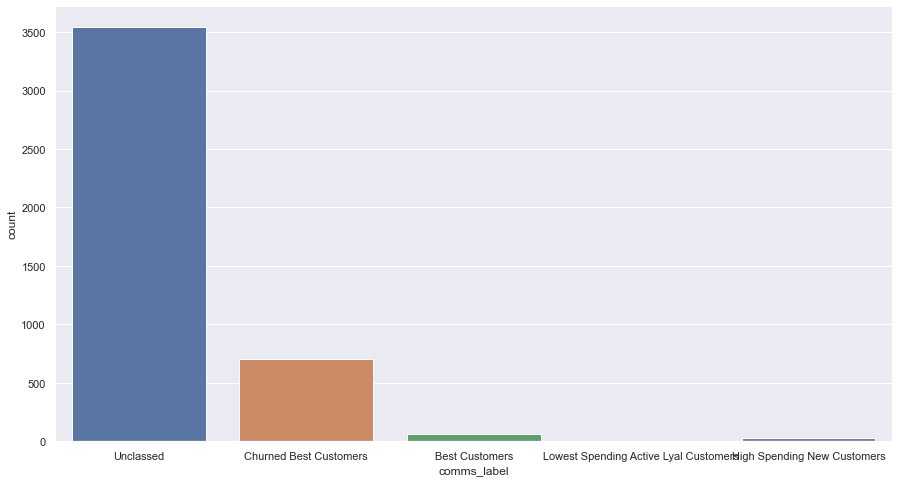

In [131]:
## Quick Plot of the count of customer ID in various classification based on the second instance which is customer Insight
ax = sns.countplot(x="comms_label", data=salesgroup)

In [132]:
salesgroup.head()

,Customer ID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,...,daysreturn,daysmaxmin,frequency,recency,R,F,M,RFM Score,comms_label,sales_label
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,...,NaN,1.000000,0.000000,325.117361,4,1,4,414,Unclassed,Loyal
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,...,49.981250,366.038194,0.019124,1.873611,1,3,4,134,Unclassed,Unclassed
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,...,39.647917,283.752778,0.014097,74.984028,3,2,4,324,Unclassed,Unclassed
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,...,NaN,1.000000,0.000000,18.124306,2,1,4,214,Unclassed,Loyal
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,...,NaN,1.000000,0.000000,309.867361,4,1,2,412,Churned Best Customers,Loyal


## A change of Approach

This doesnt look right, so lets review our RFM class methods.
Create a fuction that assign ranks from 1 to 5 
A smaller Recency value is better
For Frequency and Monetary values, a Higher value is better. 
so we have two different functions.

In [133]:
#so letsdefine the quantile and save it ina dictionary
quintiles2 = salesgroup[['recency', 'frequency', 'monetary']].quantile([.2, .4, 0.6, .8]).to_dict()

def r_score2(y):
    if y <= quintiles2['recency'][.2]:
        return 5
    elif y <= quintiles2['recency'][.4]:
        return 4
    elif y <= quintiles2['recency'][.6]:
        return 3
    elif y <= quintiles2['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score2(y, k):
    if y <= quintiles2[k][.2]:
        return 1
    elif y <= quintiles2[k][.4]:
        return 2
    elif y <= quintiles2[k][.6]:
        return 3
    elif y <= quintiles2[k][.8]:
        return 4
    else:
        return 5    

In [134]:
#lets get the RFM values by calling the function above

salesgroup['R2'] = salesgroup['recency'].apply(lambda y: r_score2(y))
salesgroup['F2'] = salesgroup['frequency'].apply(lambda y: fm_score2(y, 'frequency'))
salesgroup['M2'] = salesgroup['monetary'].apply(lambda y: fm_score2(y, 'monetary'))

salesgroup['RFM Score2'] = salesgroup['R2'].map(str) + salesgroup['F2'].map(str) + salesgroup['M2'].map(str)
salesgroup['RFM Score2'] = salesgroup['RFM Score2'].astype(int)

##So lets group the customersinto 11 based on RFM scores.


## A quick breakdown of the new cluster
category    R   F&M

Champions	4-5	4-5

Loyal Customers	2-5	3-5

Potential Loyalist	3-5	1-3

Recent Customers	4-5	0-1

Promising	3-4	0-1

Customers Needing Attention	2-3	2-3

About To Sleep	2-3	0-2

At Risk	0-2	2-5

Can’t Lose Them	0-1	4-5

Hibernating	1-2	1-2

Lost	0-2	0-2

In [135]:
def mapl(salesgroup, r_rule, fm_rule, label, colname='new_label'):
    salesgroup.loc[(salesgroup['R2'].between(r_rule[0], r_rule[1]))
            & (salesgroup['F2'].between(fm_rule[0], fm_rule[1])), colname] = label
    return salesgroup

salesgroup['new_label'] = ''

salesgroup = mapl(salesgroup, (4,5), (4,5), 'Champions')
salesgroup = mapl(salesgroup, (2,5), (3,5), 'Loyal customers')
salesgroup = mapl(salesgroup, (3,5), (1,3), 'Potential loyalist')
salesgroup = mapl(salesgroup, (4,5), (0,1), 'New customers')
salesgroup = mapl(salesgroup, (3,4), (0,1), 'Promising')
salesgroup = mapl(salesgroup, (2,3), (2,3), 'Needing attention')
salesgroup = mapl(salesgroup, (2,3), (0,2), 'About to sleep')
salesgroup = mapl(salesgroup, (0,2), (2,5), 'At risk')
salesgroup = mapl(salesgroup, (0,1), (4,5), 'Cant loose them')
salesgroup = mapl(salesgroup, (1,2), (1,2), 'Hibernating')
salesgroup = mapl(salesgroup, (0,2), (0,2), 'Lost')

In [136]:


customercategory = salesgroup.groupby('new_label').agg(
    count=('Customer ID', 'count'))

customercategory.reset_index(inplace = True)
customercategory.columns.values

array(['new_label', 'count'], dtype=object)

In [137]:
# # lets visualise the new cluster
# import squarify 
 
# #Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
# norm = matplotlib.colors.Normalize(vmin=min(customercategory['count']), vmax=max(customercategory['count']))
# colors = [matplotlib.cm.Blues(norm(value)) for value in customercategory['count']]

# #Create our plot and resize it.
# fig = plt.gcf()
# ax = fig.add_subplot()
# fig.set_size_inches(12, 6)

# #Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
# squarify.plot(label=customercategory['new_label'],sizes= customercategory['count'], color = colors, alpha=.6)
# plt.title("Customer Category Groupings based on RFM ",fontsize=23,fontweight="bold")

# #Remove our axes and display the plot
# plt.axis('off')
# plt.show()

The categories looks more like it,
So lets examine other KPI metrices that can be of importance from this

In [138]:
sales_df = salesgroup.drop(columns=['max_date','min_date', 'R', 'F', 'M' ])

In [139]:
# Get the 10 RFM score with the most customers
Top10_RFM = salesgroup['RFM Score2'].value_counts()[:10].index.tolist()
Top10_RFM 

[111, 555, 112, 211, 545, 311, 445, 212, 312, 434]

In [140]:
sakesviz = salesgroup[['Customer ID', 'Country', 'monetary','frequency','count_product']]
#top ten frequent buyer
sakesviz.nlargest(10,'frequency')


,Customer ID,Country,monetary,frequency,count_product
4017,17850.0,United Kingdom,5391.21,14.831869,297
2768,16120.0,United Kingdom,1309.14,3.966942,30
2627,15920.0,United Kingdom,167.50,3.958763,60
4229,18139.0,United Kingdom,8438.34,3.226288,159
2679,16000.0,United Kingdom,12393.70,2.993763,9
2012,15098.0,United Kingdom,39916.50,2.977257,3
3798,17545.0,United Kingdom,645.96,2.967033,145
1983,15060.0,United Kingdom,303.09,2.011173,121
62,12424.0,Australia,1760.96,2.000000,30
783,13388.0,United Kingdom,677.10,2.000000,35


In [141]:
#top ten volume of Item buyer
sakesviz.nlargest(10, 'count_product')

,Customer ID,Country,monetary,frequency,count_product
4011,17841.0,United Kingdom,40991.57,0.332535,7847
1880,14911.0,EIRE,143825.06,0.538765,5677
1290,14096.0,United Kingdom,65164.79,0.172994,5111
326,12748.0,United Kingdom,33719.73,0.561527,4596
1662,14606.0,United Kingdom,12156.65,0.249260,2700
2177,15311.0,United Kingdom,60767.90,0.243253,2379
1690,14646.0,Netherlands,280206.02,0.208989,2080
562,13089.0,United Kingdom,58825.83,0.263629,1818
691,13263.0,United Kingdom,7454.07,0.107727,1677
1435,14298.0,United Kingdom,51527.30,0.124643,1637


In [142]:
#Top10_Customer_LTV
sakesviz.nlargest(10,'monetary')

,Customer ID,Country,monetary,frequency,count_product
1690,14646.0,Netherlands,280206.02,0.208989,2080
4202,18102.0,United Kingdom,259657.30,0.163133,431
3729,17450.0,United Kingdom,194550.79,0.127717,337
3009,16446.0,United Kingdom,168472.50,0.009710,3
1880,14911.0,EIRE,143825.06,0.538765,5677
55,12415.0,Australia,124914.53,0.066851,716
1334,14156.0,EIRE,117379.63,0.151531,1400
3772,17511.0,United Kingdom,91062.38,0.083334,963
2703,16029.0,United Kingdom,81024.84,0.187488,242
0,12346.0,United Kingdom,77183.60,0.000000,1


In [143]:
# Summary metrics for the 10 most popular RFM
Top10_RFM_summary = salesgroup[salesgroup['RFM Score2'].isin(Top10_RFM)].groupby('RFM Score2').agg(
    mean_recency=('recency', 'mean'),
    std_recency=('recency', 'std'),
    mean_frequency=('frequency', 'mean'),
    std_frequency=('frequency', 'std'),
    mean_monetary=('monetary', 'mean'),
    std_monetary=('monetary', 'std'),   
    samples=('Customer ID', lambda x: len(x)*100/len(salesgroup['new_label']))
).round(2)

Top10_RFM_summary.reset_index(inplace = True)

Top10_RFM_summary

,RFM Score2,mean_recency,std_recency,mean_frequency,std_frequency,mean_monetary,std_monetary,samples
0,111,281.51,57.46,0.00,0.00,146.33,57.01,7.67
1,112,277.07,57.40,0.00,0.00,349.98,62.11,4.82
2,211,124.07,34.08,0.00,0.00,142.25,57.74,3.32
3,212,114.60,34.17,0.00,0.00,346.33,56.26,2.47
4,311,51.47,10.97,0.00,0.00,160.53,56.53,2.97
5,312,53.15,10.90,0.00,0.00,361.33,59.33,2.40
6,434,21.94,5.41,0.02,0.00,1387.58,305.28,2.35
7,445,22.20,5.49,0.03,0.00,4164.43,2642.68,2.60
8,545,5.89,3.61,0.03,0.00,4015.65,2886.71,3.04
9,555,4.34,3.44,0.09,0.21,15477.51,32972.84,5.00


In [144]:
# Summary metrics per RFM Category
Category_summary = salesgroup.groupby('new_label').agg(
    mean_recency=('recency', 'mean'),
    std_recency=('recency', 'std'),
    mean_frequency=('frequency', 'mean'),
    std_frequency=('frequency', 'std'),
    mean_monetary=('monetary', 'mean'),
    std_monetary=('monetary', 'std'),  
    samples_percentage=('Customer ID', lambda x: len(x)*100/len(salesgroup['RFM Score2']))
).round(2)

Category_summary.reset_index(inplace = True)
Category_summary

,new_label,mean_recency,std_recency,mean_frequency,std_frequency,mean_monetary,std_monetary,samples_percentage
0,About to sleep,51.78,11.13,0.00,0.00,459.32,503.45,8.69
1,At risk,121.99,42.62,0.08,0.31,1218.41,1253.93,12.19
2,Cant loose them,244.98,51.50,0.37,1.20,1292.81,4282.29,4.61
3,Lost,216.48,93.45,0.00,0.00,446.71,2460.11,23.21
4,Loyal customers,20.10,17.87,0.10,0.32,4838.44,15323.81,29.04
5,Needing attention,50.66,11.31,0.02,0.00,1335.76,1007.37,4.89
6,New customers,6.69,3.66,0.00,0.00,348.64,477.75,1.54
7,Potential loyalist,15.33,9.05,0.01,0.00,1785.86,7500.87,12.01
8,Promising,22.77,5.29,0.00,0.00,312.65,300.59,3.83


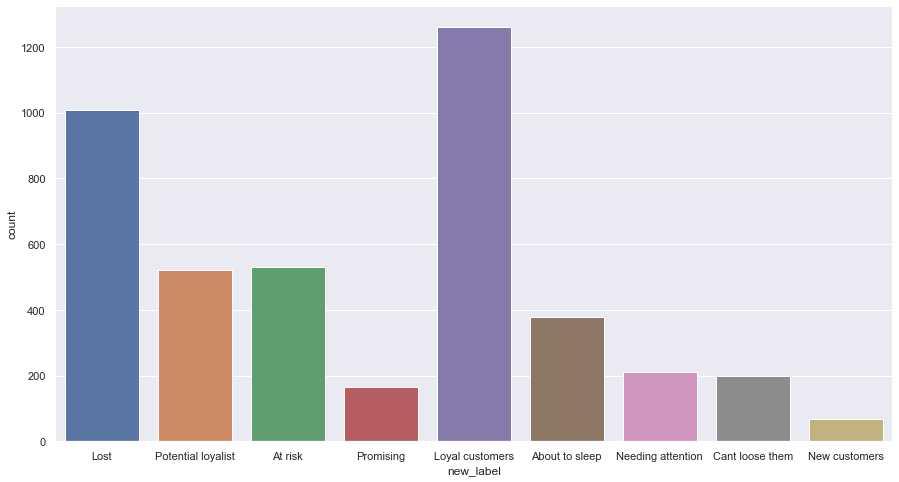

In [145]:
## Quick Plot of the count of customer ID in various classification based on the second instance which is customer Insight
ax = sns.countplot(x="new_label", data=salesgroup)

[15.0, 8.0]


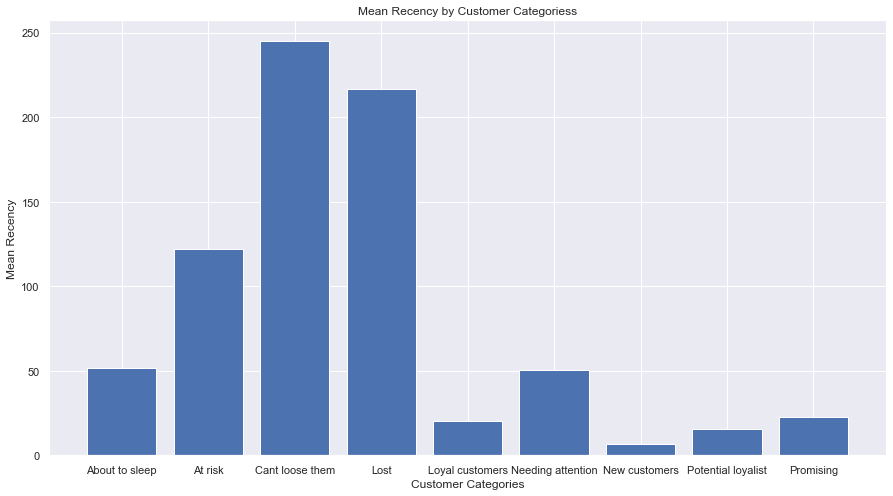

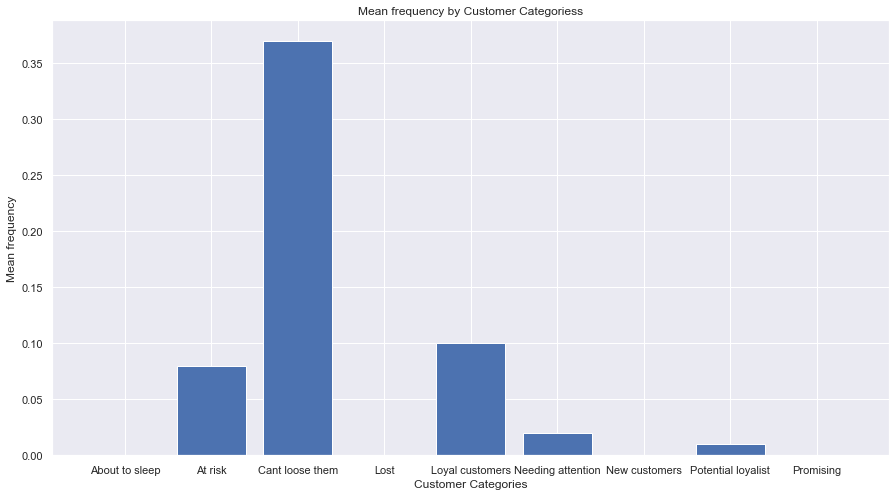

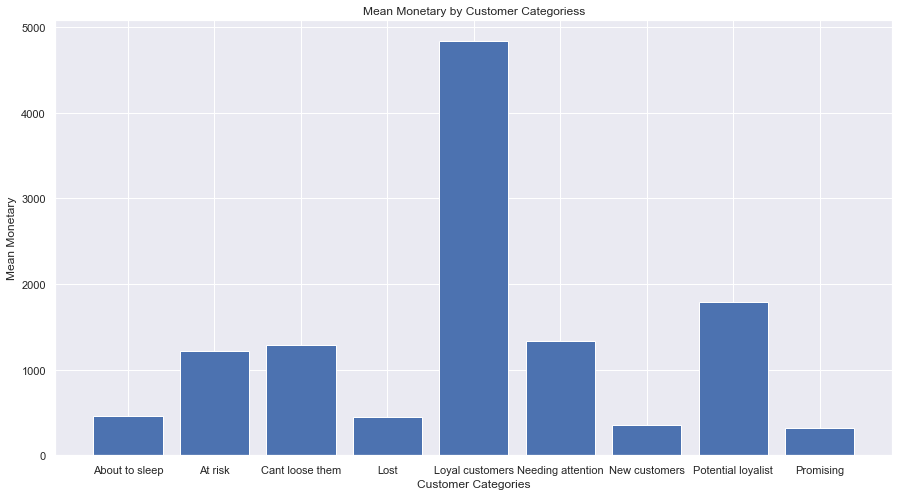

In [146]:
print(plt.rcParams.get('figure.figsize'))


plt.xticks(range(len(Category_summary['mean_recency'])), Category_summary['new_label'])
plt.xlabel('Customer Categories')
plt.ylabel('Mean Recency')
plt.title('Mean Recency by Customer Categoriess')
plt.bar(range(len(Category_summary['mean_recency'])), Category_summary['mean_recency']) 
plt.show()


plt.xticks(range(len(Category_summary['mean_frequency'])), Category_summary['new_label'])
plt.xlabel('Customer Categories')
plt.ylabel('Mean frequency')
plt.title('Mean frequency by Customer Categoriess')
plt.bar(range(len(Category_summary['mean_frequency'])), Category_summary['mean_frequency']) 
plt.show()


plt.xticks(range(len(Category_summary['mean_monetary'])), Category_summary['new_label'])
plt.xlabel('Customer Categories')
plt.ylabel('Mean Monetary')
plt.title('Mean Monetary by Customer Categoriess')
plt.bar(range(len(Category_summary['mean_monetary'])), Category_summary['mean_monetary']) 
plt.show()

In [147]:
customercategory = salesgroup.groupby('new_label').agg(
    count=('Customer ID', 'count'))
customercategory.reset_index(inplace = True)
customercategory

,new_label,count
0,About to sleep,377
1,At risk,529
2,Cant loose them,200
3,Lost,1007
4,Loyal customers,1260
5,Needing attention,212
6,New customers,67
7,Potential loyalist,521
8,Promising,166


## From the charts above, we can conclude that there are other groups that have not been captured by the RFM clusters, perhaps a more sophisticated method like Kmean etc will do a better job.

Dont forget to UPvote this Kernel and Look out for the next one, with application of various Clustering models.

In [ ]:
sales_cleansed = salesgroup[['Customer ID', 'Country', 'sum_price', 'sum_quantity', 'monetary',
        'frequency', 'recency','R2', 'F2', 'M2','RFM Score2', 'new_label']]

In [ ]:
sales_cleansed.to_csv('sales_cleansed.csv', index=False)

In [ ]:
sales_cleansed